In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def showImg(img, title = ''):
    plt.figure(figsize =(20,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
def showGrayImg(img, title = ''):
    plt.figure(figsize =(20,15));
    plt.title(title)
    plt.imshow(img, cmap = 'gray')
    
all_contours = -1
green = (0,255,0)
thickness = 2

In [ ]:
cv2.__version__

In [13]:
coins = cv2.imread('coins.jpg')
#showImg(coins)

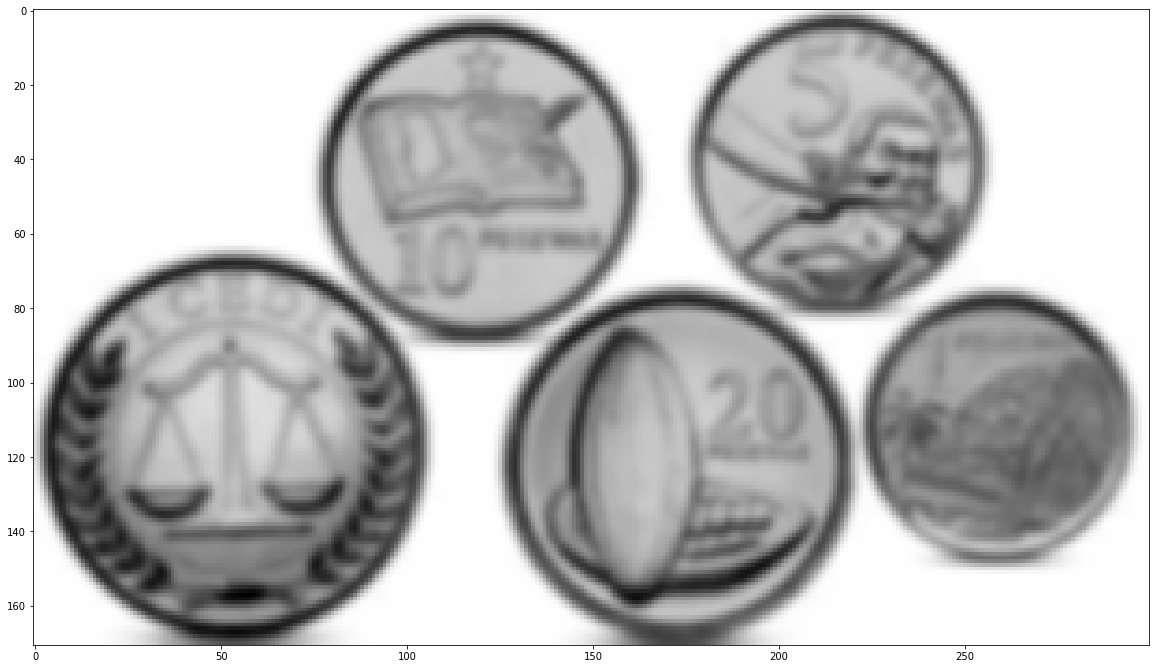

In [15]:
graycoins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

gaussianBlur = cv2.GaussianBlur(graycoins, (7,7),-1)
showGrayImg(gaussianBlur)


#showGrayImg(edges)

In [32]:
coins_contour =   cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

NameError: name 'edges' is not defined

In [ ]:
print(f'Found {len(coins_contour[1])} countour(s)')

In [ ]:
#cv2.drawContours(coins,coins_contour[1],-1, (0,255,0),3)
#showImg(coins)

In [ ]:
card = cv2.imread('metrocard.png')
card = cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)
#showGrayImg(card)

In [ ]:
cardedges = cv2.Canny(card,0,200)
#showGrayImg(edges)

In [ ]:
copycard = card.copy()
card_contour= cv2.findContours(cardedges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(copycard,card_contour[1],-1, (0,255,0),1)
#showGrayImg(copycard)

In [ ]:
def get_contour_areas(contours) :
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [ ]:
coins_contours = cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour_areas = get_contour_areas(coins_contours[1])

In [ ]:
print(f'Contour areas before sorting: {contour_areas}')

In [ ]:
contour_areas = sorted(contour_areas, reverse = True)
print(f'Contour areas after sorting: {contour_areas}')

In [ ]:
sorted_contours = sorted(coins_contours[1], key = cv2.contourArea, reverse = True)
print(f'Total number of contours: {len(sorted_contours)}\nContour areas after sorting {sorted_contours}')

In [ ]:
big_contours_only = sorted_contours[0:5]
print(big_contours_only)

# By X coordinate(left to right)

In [ ]:
def get_contour_x_center_coordinates(contours):
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

In [ ]:
sorted_contours_left_to_right = sorted(coins_contours[1], key = get_contour_x_center_coordinates)

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [ ]:
corted_contours, boxes = sort_contours(coins_contours[1])

In [ ]:
# for idx, c in enumerate(sorted_contours):
#     if idx > 8:
#         break
#     cv2.drawContours(coins,[c], -1,(0,255,0),3)
#     showImg(coins)

# Approximating contours

In [ ]:
house = cv2.imread('house.jpg')
house = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
figure = cv2.imread('house.jpg')
figure = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
#showGrayImg(house)

In [ ]:
edges = cv2.Canny(house, 0, 255)
house_contours = cv2.findContours(edges,cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'Found {len(house_contours)} contours')

for c in house_contours[1]:
    accuracy = 0.1
    perimeter = cv2.arcLength(c, True)
    epsilon = accuracy * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    cv2.drawContours(house, [approx], 0, (0,255,0), 2)
    
   # showGrayImg(house, f'Found {len(approx)} lines in this house')

In [ ]:
edges = cv2.Canny(figure, 0, 255)
figure_contours = cv2.findContours(edges,cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'Found {len(figure_contours)} contours')

for c in figure_contours[1]:
    accuracy = 0.1
    perimeter = cv2.arcLength(c, True)
    epsilon = accuracy * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    cv2.drawContours(figure, [approx], 0, (0,255,0), 2)
    
    showGrayImg(figure, f'Found {len(approx)} lines in this figure')

In [ ]:
car = cv2.imread('car.jpg')
showImg(car)

In [ ]:
car_clone = np.copy(car)
car_clone = cv2.cvtColor(car_clone, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(car_clone, 127,180, cv2.THRESH_BINARY_INV)
showGrayImg(thresh)

In [ ]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)

In [ ]:
for contour in contours[1]:
    hull = cv2.convexHull(contour)
    cv2.drawContours(car, [hull], 0 , (0,255,0), 2)
showImg(car)

# Fitting Rectangle

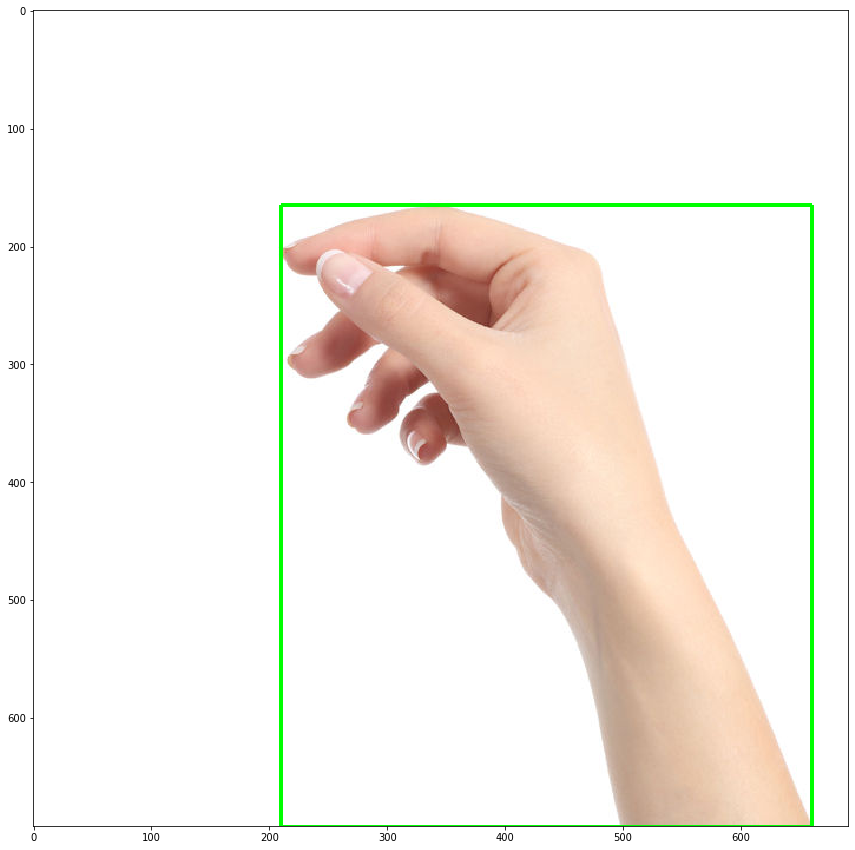

In [33]:
hand = cv2.imread('hand.jpg')
grayHand = cv2.imread('hand.jpg' , 0)
ret, thresh = cv2.threshold(grayHand, 220,255, cv2.THRESH_BINARY_INV)
x,y,w,h = cv2.boundingRect(thresh)
cv2.rectangle(hand,(x,y),(x+w,y+h), (0,255,0), 2)
showImg(hand)

# Minimum Enclosing circle

In [ ]:
# car = cv2.imread('car.jpg')
car_ = np.copy(car)
car_copy = cv2.cvtColor(car_, cv2.COLOR_BGR2GRAY)


# img = cv2.imread('car2.png')
# img_gray = cv2.imread('car2.png', 0)

# ret, thresh = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY_INV)

# contours= cv2.findContours(thresh, cv2.RETR_EXTERNAL,
#                                        cv2.CHAIN_APPROX_NONE)

# (x, y), radius = cv2.minEnclosingCircle(contours[1][0])

# center = (int(x), int(y))
# radius = int(radius)

# cv2.circle(img, center, radius, (0, 255, 0), 2)

# showImg(img)


img = cv2.imread('car2.png')
img_gray = cv2.imread('car2.png', 0)

ret, thresh = cv2.threshold(img_gray, 127, 180, cv2.THRESH_BINARY_INV)

contours= cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE)

(x, y), radius = cv2.minEnclosingCircle(contours[1][0])

center = (int(x), int(y))
radius = int(radius)

#cv2.circle(img, center, radius, (0, 255, 0), 2)

#showImg(img)




In [10]:
coin1_gray = cv2.imread('coin1.jpg' , 0)
coin2_gray = cv2.imread('coin2.jpg' , 0)
coin1 = cv2.imread('coin1.jpg')
#showImg(coin1)
#showGrayImg(coin1_gray)

7


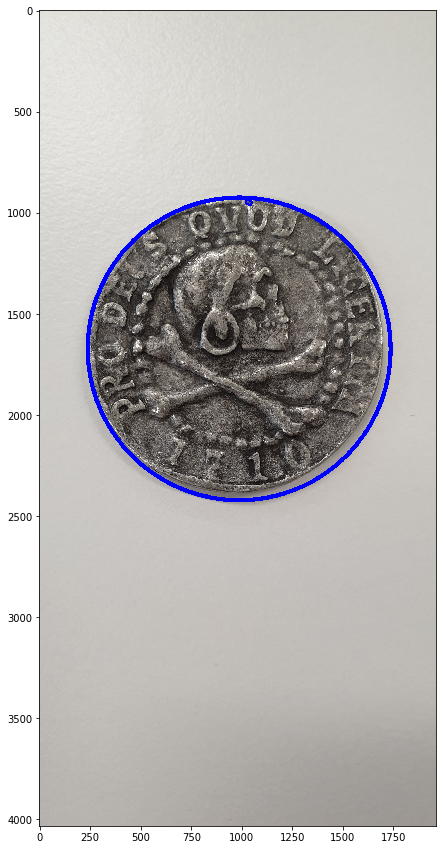

In [31]:
#showGrayImg(coin1_gray)
gaussianBlur = cv2.GaussianBlur(coin1_gray, (27,27),-1)
ret, thresh = cv2.threshold(gaussianBlur, 127, 180, cv2.THRESH_BINARY_INV)
#showGrayImg(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours = sorted(contours[1], key = cv2.contourArea, reverse = True)
print(len(sorted_contours))
# #showGrayImg(gaussianBlur)

#for contour in sorted_contours[1]:
(x,y), radius = cv2.minEnclosingCircle(sorted_contours[0])
center = (int(x) , int(y))
radius = int(radius)

cv2.circle (coin1 , center, radius, (255,0,0), 3)
showImg(coin1)

